## Problem: Largest rectangle in histogram

LeetCode: 84

https://leetcode.com/problems/largest-rectangle-in-histogram/description/

Given an array of integers heights representing the histogram's bar height where the width of each bar is 1, return the area of the largest rectangle in the histogram.

 

Example 1:

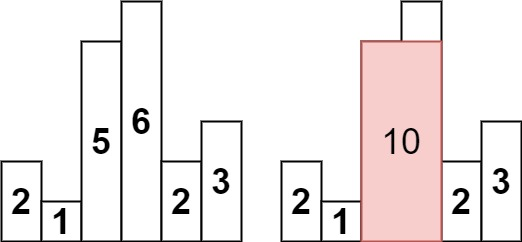

    Input: heights = [2,1,5,6,2,3]
    Output: 10
    Explanation: The above is a histogram where width of each bar is 1.
    The largest rectangle is shown in the red area, which has an area = 10 units.
Example 2:


    Input: heights = [2,4]
    Output: 4
 

Constraints:

    1 <= heights.length <= 105
    0 <= heights[i] <= 104


## Approach:
To find the area of one histogram at ith position. We need to find how many histograms are bigger or equal to selected histogram in
both sides (left and right). In other waym we need to find next histogram having smaller heights in both direction.
Monotonic stack is useful here. We will create two array having position next smaller histogram positions one for each directions.

Now, we know for a given histogram, how much left and right we can go. Calculate the Area by height x width. width = (right[i]-left[i] + 1).
Save the max area and return.

In [5]:
def largestRectangleArea(heights):
    n = len(heights)
    left = [0]*n # store distance from left
    right = [0]*n # store distance from right
    stack = [] # Monotonic stack
    # Start from right
    for i in range(n-1, -1,-1):
        h = heights[i]
        while stack and h <= stack[-1][1]: # Need to find smaller height towards right
            stack.pop()
        if stack:
            right[i] = stack[-1][0] -1
        else:
            right[i] = n-1
        stack.append((i, h))
    print("right = ", right)
    # travers from left
    stack = []
    for i in range(n):
        h = heights[i]
        while stack and h <= stack[-1][1]: ## Need to find smaller height towards left
            stack.pop()
        if stack:
            left[i] = stack[-1][0] + 1
        else:
            left[i] = 0
        stack.append((i,h))
    print("left = ", left)
    # calculate Area and look for maximum
    maxArea = 0
    for i in range(n):
        h = heights[i]
        maxArea = max(maxArea, h*(right[i]-left[i] + 1))
    return maxArea

In [6]:
heights = [2,1,5,6,2,3]
largestRectangleArea(heights)

right =  [0, 5, 3, 3, 5, 5]
left =  [0, 0, 2, 3, 2, 5]


10